# Human Emotion Prediction

## Import data sets and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('./train.txt')

In [3]:
train_data.head()

i didnt feel humiliated;sadness
0  i can go from feeling so hopeless to so damned...
1  im grabbing a minute to post i feel greedy wro...
2  i am ever feeling nostalgic about the fireplac...
3                         i am feeling grouchy;anger
4  ive been feeling a little burdened lately wasn...

## Data Visualization

In [4]:
train_data=pd.read_csv('./train.txt', header=None,sep=';', names=['Comment','Emotion'],encoding='utf-8')

In [5]:
train_data.head()

Comment  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [6]:
train_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [7]:
train_data.duplicated().sum()

1

In [8]:
train_data=train_data.drop_duplicates()

<Axes: xlabel='Emotion', ylabel='count'>

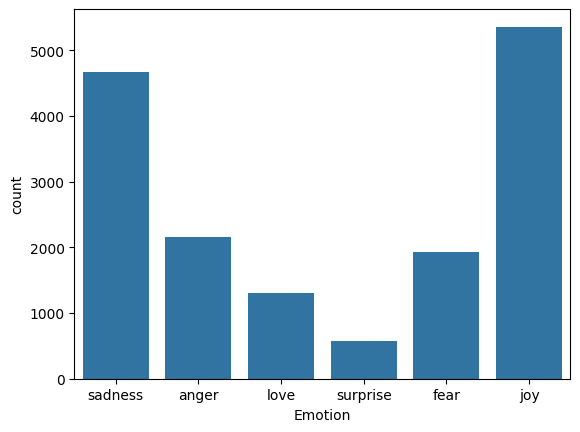

In [9]:
sns.countplot(data=train_data,x='Emotion')

<Axes: xlabel='length', ylabel='Count'>

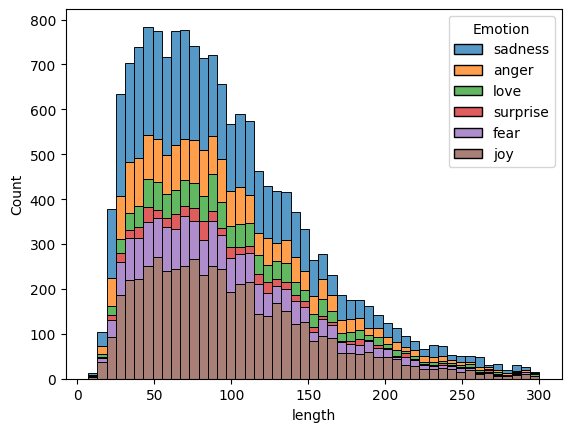

In [10]:
train_data['length']=[len(x) for x in train_data['Comment']]
sns.histplot(data=train_data,x='length',hue='Emotion',multiple='stack')

## WordCloud

In [11]:
from wordcloud import WordCloud

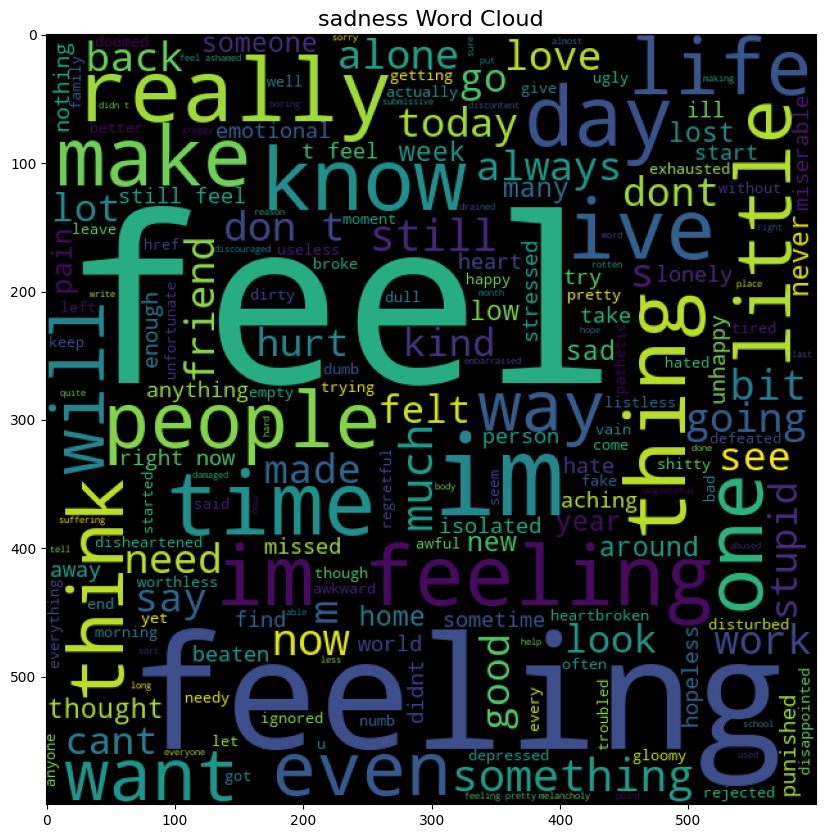

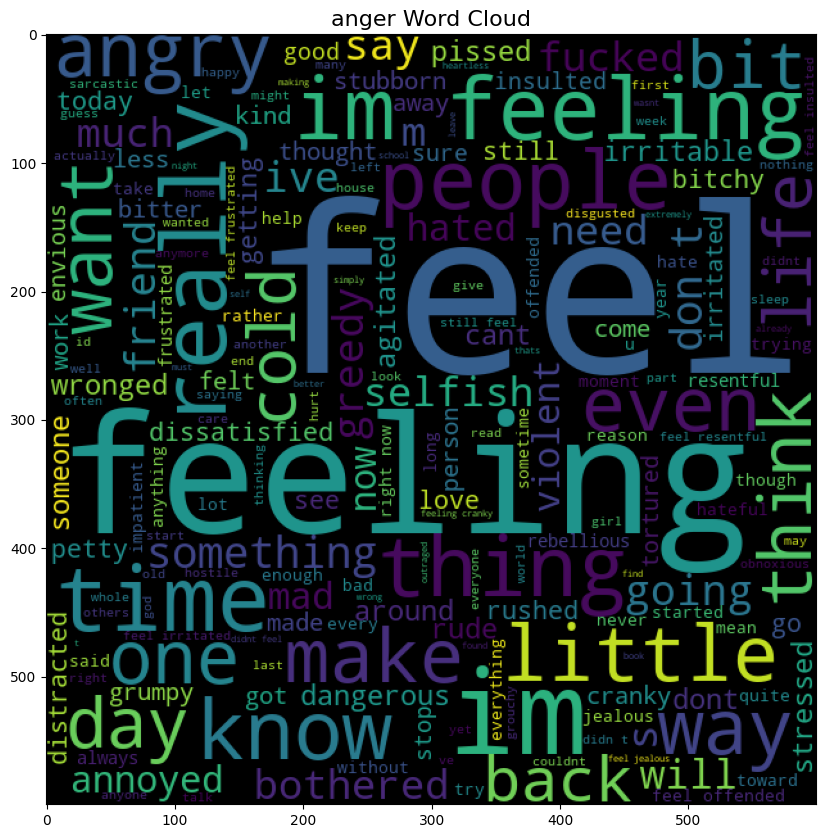

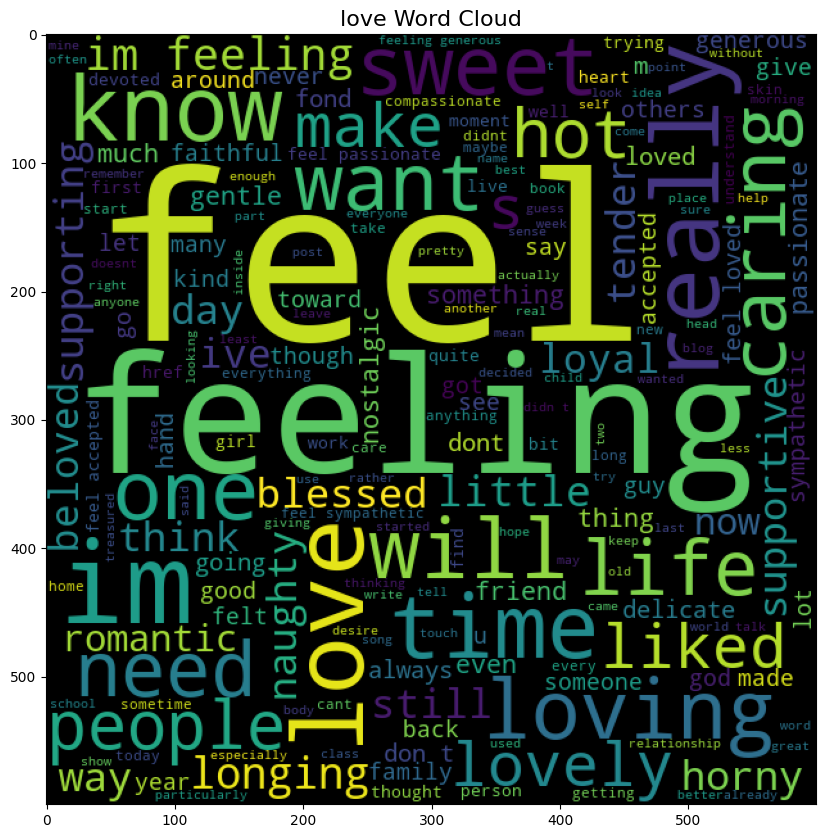

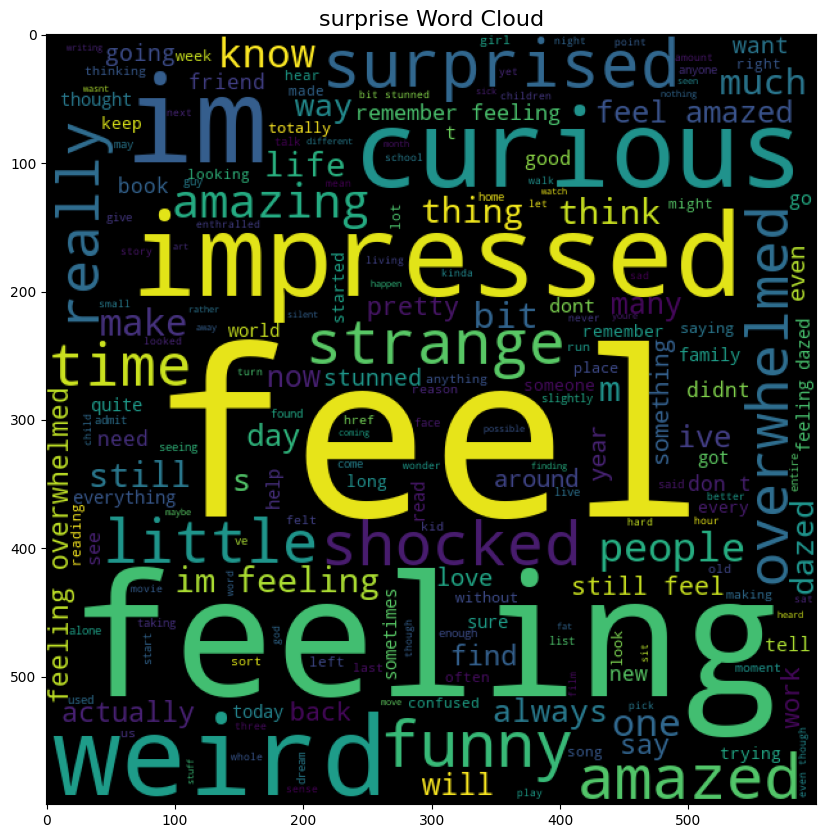

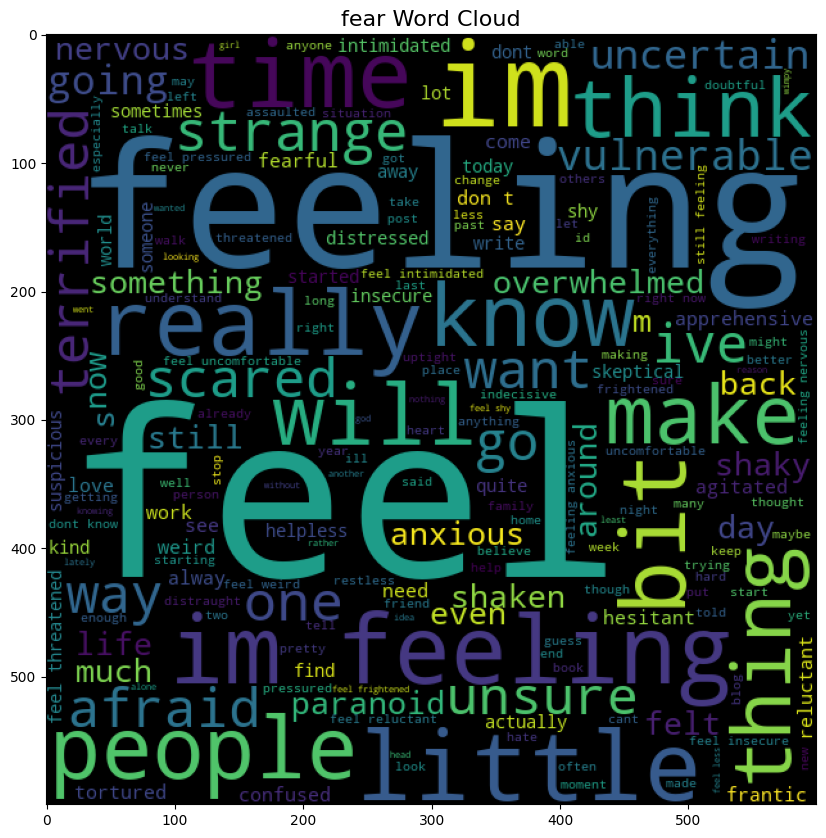

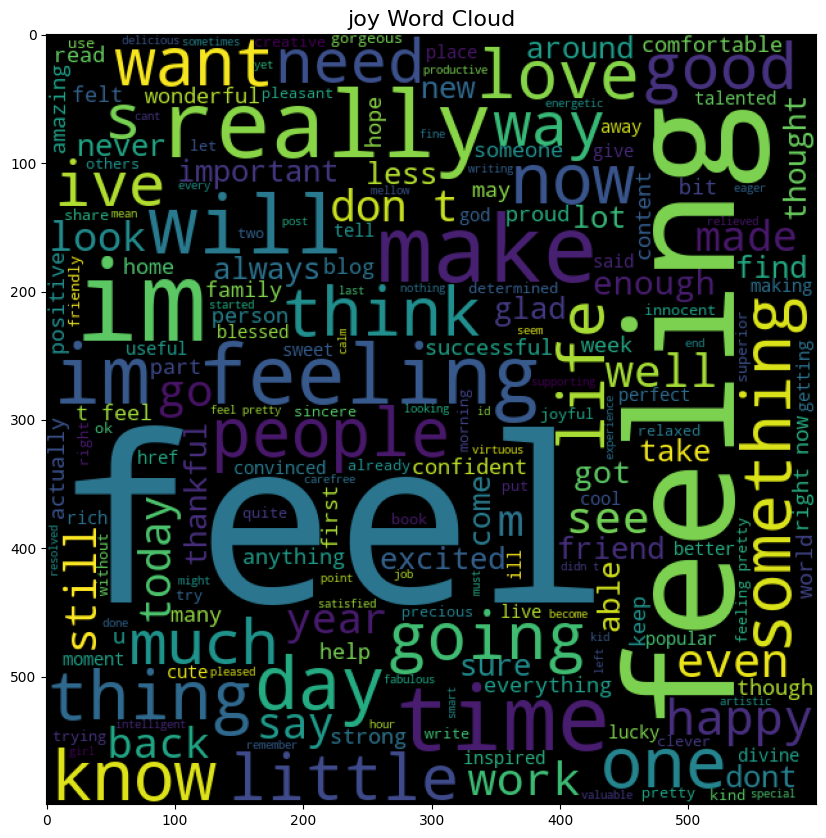

In [12]:
def words_cloud(wordcloud,emotion):
    plt.figure(figsize=(101,10))
    plt.title(emotion+" Word Cloud", size=16)
    plt.imshow(wordcloud)

emotions_list=train_data['Emotion'].unique()
for emotion in emotions_list:
    text=' '.join([sentence for sentence in train_data.loc[train_data['Emotion']==emotion,'Comment']])
    wordcloud = WordCloud(width=600,height=600).generate(text)
    words_cloud(wordcloud,emotion)

## Data Preprocessing

In [13]:
#Label Encoding Emotion
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train_data['Emotion_lb']=lb.fit_transform(train_data['Emotion'])

In [14]:
train_data.head()

Comment  Emotion  length  \
0                            i didnt feel humiliated  sadness      23   
1  i can go from feeling so hopeless to so damned...  sadness     108   
2   im grabbing a minute to post i feel greedy wrong    anger      48   
3  i am ever feeling nostalgic about the fireplac...     love      92   
4                               i am feeling grouchy    anger      20   

   Emotion_lb  
0           4  
1           4  
2           0  
3           3  
4           0

In [15]:
X=train_data['Comment']
y=train_data['Emotion_lb']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Tfidf Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf=TfidfVectorizer(stop_words='english')

In [20]:
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

## Creating Estimator

In [21]:
def result(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [23]:
log_model=LogisticRegression()

In [24]:
result(log_model)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       460
           1       0.83      0.78      0.80       365
           2       0.81      0.95      0.88      1072
           3       0.87      0.64      0.73       255
           4       0.88      0.93      0.91       917
           5       0.93      0.42      0.58       131

    accuracy                           0.86      3200
   macro avg       0.88      0.75      0.79      3200
weighted avg       0.86      0.86      0.85      3200



### SVC

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model=SVC()
result(svc_model)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       460
           1       0.81      0.76      0.78       365
           2       0.79      0.96      0.87      1072
           3       0.90      0.59      0.71       255
           4       0.89      0.92      0.91       917
           5       0.87      0.46      0.60       131

    accuracy                           0.85      3200
   macro avg       0.86      0.74      0.78      3200
weighted avg       0.85      0.85      0.84      3200



### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rand_model=RandomForestClassifier()
result(rand_model)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       460
           1       0.81      0.85      0.83       365
           2       0.88      0.91      0.89      1072
           3       0.81      0.74      0.78       255
           4       0.91      0.91      0.91       917
           5       0.84      0.66      0.74       131

    accuracy                           0.87      3200
   macro avg       0.86      0.82      0.84      3200
weighted avg       0.87      0.87      0.87      3200



### Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
nb_model=MultinomialNB()
result(nb_model)

              precision    recall  f1-score   support

           0       0.96      0.27      0.43       460
           1       0.90      0.25      0.39       365
           2       0.63      0.97      0.76      1072
           3       1.00      0.07      0.12       255
           4       0.66      0.94      0.78       917
           5       1.00      0.01      0.02       131

    accuracy                           0.67      3200
   macro avg       0.86      0.42      0.42      3200
weighted avg       0.76      0.67      0.59      3200



## Final model selection and Deployment

#### Accuracy of Random Forests is maximum so we use it and train the model on complete dataset.

In [31]:
Final_model=RandomForestClassifier()

In [32]:
tfidf_X=tfidf.transform(X)

In [33]:
Final_model.fit(tfidf_X,y)

RandomForestClassifier()

## Make some prediction

In [34]:
def predict_emotion(input_text):
    text=tfidf.transform([input_text])

    # Predict emotion
    pred=Final_model.predict(text)
    decoded_labels = lb.inverse_transform(range(max(lb.transform(train_data['Emotion']))+1))
    decoded_label = decoded_labels[pred]

    return pred,decoded_label

In [35]:
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]

In [36]:
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    print("Label :",label)
    print("================================================================")

i didnt feel humiliated
Prediction : [4]
Label : ['sadness']
i feel strong and good overall
Prediction : [2]
Label : ['joy']
im grabbing a minute to post i feel greedy wrong
Prediction : [0]
Label : ['anger']
He was speechles when he found out he was accepted to this new job
Prediction : [2]
Label : ['joy']
This is outrageous, how can you talk like that?
Prediction : [2]
Label : ['joy']
I feel like im all alone in this world
Prediction : [4]
Label : ['sadness']
He is really sweet and caring
Prediction : [3]
Label : ['love']
You made me very crazy
Prediction : [2]
Label : ['joy']
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction : [3]
Label : ['love']
i am feeling grouchy
Prediction : [0]
Label : ['anger']
He hates you
Prediction : [2]
Label : ['joy']
